In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import vartools as vt

## get_data

In [2]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"
type = 'Adj Close' # 'Close', select the type of price you want to download

data = vt.get_data(stocks, start_date, end_date, type)

[*********************100%***********************]  5 of 5 completed


## var_stocks

In [3]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"
type = 'Adj Close' # 'Close', select the type of price you want to download

data = vt.get_data(stocks, start_date, end_date, type)
n_stocks =[2193, 1211, 3221, 761, 1231]
conf = 95
long = True

var_df = vt.var_stocks(data, n_stocks, conf, long, stocks)
var_df

[*********************100%***********************]  5 of 5 completed


,Métrica,Porcentaje,cash
0,VaR,0.0288,"33,073.9090"
1,cVaR,0.0463,"53,131.4765"


## var_forex

In [4]:
currencies = ['CHFMXN=X', 'MXN=X']
start_date = "2020-01-01"
end_date = "2024-12-02"
type = 'Adj Close'

data = vt.get_data(currencies, start_date, end_date, type)
positions = [7100000, 5300000] # How much you have in each currency. Must match the order in currencies.
conf = 99 # Nivel de confianza
long = True

var_forex_df = vt.var_forex(data, positions, conf, long, currencies)
var_forex_df

[*********************100%***********************]  2 of 2 completed


,Métrica,Porcentual,Cash
0,VaR,0.0185,"5,041,647.6883"
1,cVaR,0.0238,"6,478,978.9919"


## rebalance_stocks

In [5]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"
type = 'Adj Close' # 'Close', select the type of price you want to download

data = vt.get_data(stocks, start_date, end_date, type)

rt = data.pct_change().dropna()
stock_value = n_stocks * data.iloc[-1]
portfolio_value = stock_value.sum()
w_original = stock_value / portfolio_value
w_opt = [0.33, 0.15, 0.06, 0.46, 0.00]

rebalance_df = vt.rebalance_stocks(w_original, w_opt, data, stocks, portfolio_value)
rebalance_df

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,TSLA,AMD,LMT,JPM
Peso Original,0.2457,0.1301,0.1820,0.3064,0.1359
Peso Óptimo,0.3300,0.1500,0.0600,0.4600,0.0000
Acciones (C/V),752.0000,185.0000,"-2,159.0000",381.0000,"-1,231.0000"


## var_weights

In [6]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"
type = 'Adj Close' # 'Close', select the type of price you want to download

data = vt.get_data(stocks, start_date, end_date, type)

weights = [0.2457, 0.1301, 0.1820, 0.3064, 0.1358]
conf = 95
var_pct, cvar_pct = vt.var_weights(data, weights, conf)
var_pct, cvar_pct

[*********************100%***********************]  5 of 5 completed


(0.028849616497391074, 0.046343961987439536)

## opt_sharpe

In [7]:
stocks=['WMT','AAPL','GOOGL','PG','XOM','KO','CMG','F']
start_date='2020-01-01'
end_date='2024-11-24'
type='Adj Close'

data = vt.get_data(stocks, start_date, end_date, type)
returns = data.pct_change().dropna()
rf = 0.04413

opt_sharpe_df = vt.opt_sharpe(returns, rf)
opt_sharpe_df

[*********************100%***********************]  8 of 8 completed


Ticker,WMT,AAPL,GOOGL,PG,XOM,KO,CMG,F
w,0.4220,0.1577,0.0000,0.0000,0.1414,0.0000,0.2789,0.0000


## min_variance

In [8]:
stocks=['WMT','AAPL','GOOGL','PG','XOM','KO','CMG','F']
start_date='2020-01-01'
end_date='2024-11-24'
type='Adj Close'

data = vt.get_data(stocks, start_date, end_date, type)
returns = data.pct_change().dropna()

min_variance_df = vt.min_variance(returns)
min_variance_df

[*********************100%***********************]  8 of 8 completed


Ticker,WMT,AAPL,GOOGL,PG,XOM,KO,CMG,F
w,0.2833,0.0000,0.0194,0.2568,0.0816,0.2598,0.0989,0.0000


## mcc_portfolio

In [9]:
# bonds, commodities, equities and real estate
stocks = ['VBTLX', 'GSG', 'VTI', 'VNQ']
start_date = '2019-01-01'
end_date = '2024-01-01'
type = 'Adj Close'

data = vt.get_data(stocks, start_date, end_date, type)
returns = data.pct_change().dropna()
alpha = 0.05

mcc_weights_df = vt.mcc_portfolio(returns, alpha)
mcc_weights_df

[*********************100%***********************]  4 of 4 completed


Ticker,VBTLX,GSG,VTI,VNQ
w,0.6601,0.1209,0.1171,0.1018


## plot_weights

[*********************100%***********************]  8 of 8 completed


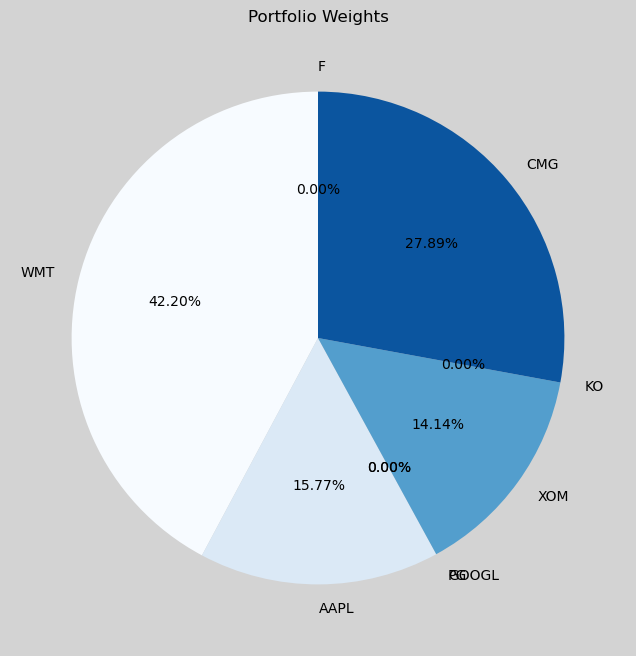

In [10]:
stocks=['WMT','AAPL','GOOGL','PG','XOM','KO','CMG','F']
start_date='2020-01-01'
end_date='2024-11-24'
type='Adj Close'

data = vt.get_data(stocks, start_date, end_date, type)
returns = data.pct_change().dropna()
rf = 0.04413

opt_sharpe_df = vt.opt_sharpe(returns, rf)

vt.plot_weights(opt_sharpe_df)